# Lecture 18: Why the mean matters

## 8.2: Module 8 Notebook 2

In [2]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Chebyshev's Bounds

In [3]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


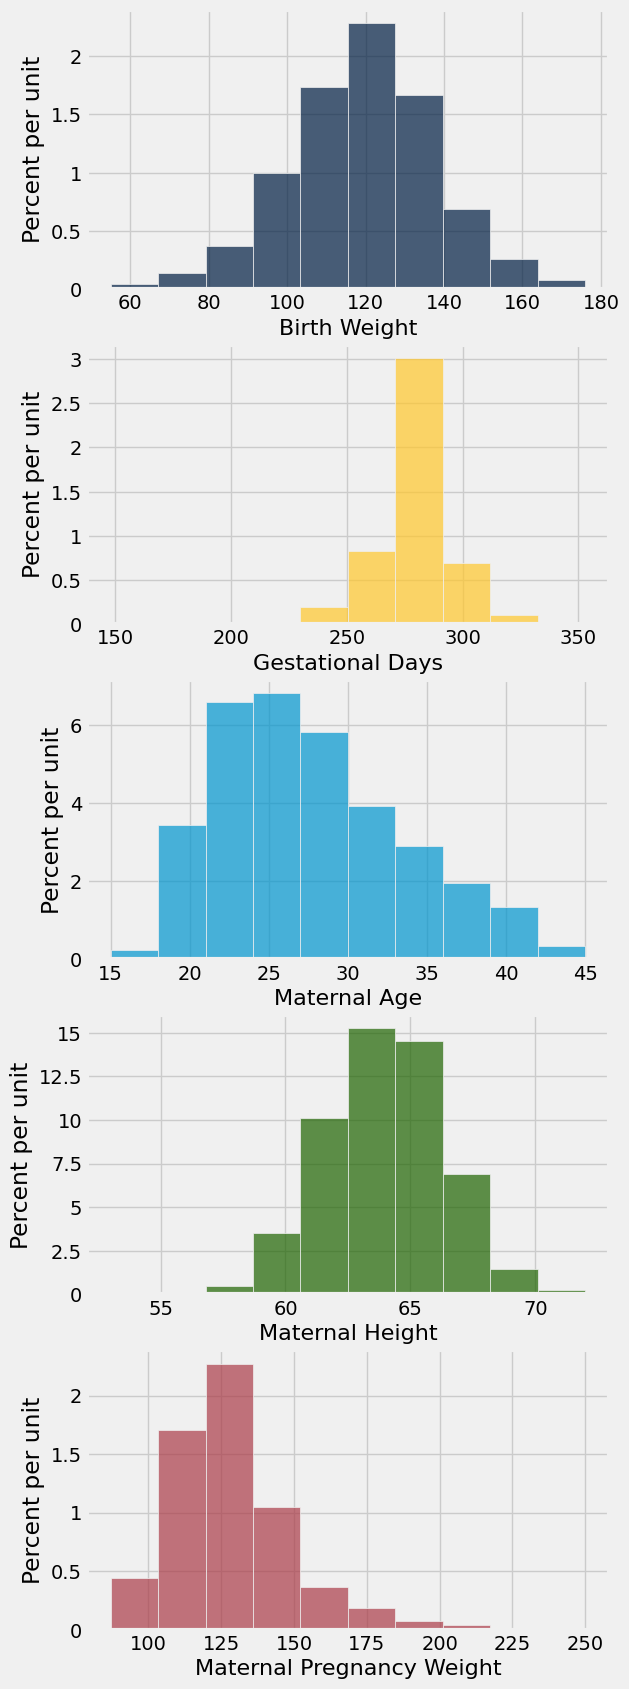

In [4]:
# let's visualize all the columns in births in separate histograms
b = births.drop("Maternal Smoker")
b.hist(overlay = False)

In [5]:
# now, let's compute the mean and sd of 
# the maternal pregrancy weight column
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.725449704280411)

In [6]:
# let's test Chebyshev's theory

# Ex. 1: let's get all maternal pregrancy weight values within 3SDs
within_3_SDs = births.where('Maternal Pregnancy Weight', 
                            are.between(mean - 3*sd, mean + 3*sd))

In [7]:
# Ex.1: Proportion within 3 SDs of the mean

within_3_SDs.num_rows / births.num_rows

0.9863713798977853

In [8]:
# Chebyshev's bound: 
# The proportion we calculated above should be at least

1 - 1/(3**2)

0.8888888888888888

In [9]:
# Now, let's check whether Chebyshev's bounds extend to other columns

# first, we print all the column names
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight',
 'Maternal Smoker')

In [10]:
# See if Chebyshev's bounds work for distributions with various shapes

# Remember the histograms above have different distributions, 
# i.e., each column's distribution has a different shape

for feature in births.labels:
    values = births.column(feature)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(feature)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '% of the data')


Birth Weight
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.57 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Gestational Days
Average plus or minus 2 SDs: 93.78 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs: 99.57 % of the data
Average plus or minus 5 SDs: 99.83 % of the data

Maternal Age
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.91 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Height
Average plus or minus 2 SDs: 97.19 % of the data
Average plus or minus 3 SDs: 99.66 % of the data
Average plus or minus 4 SDs: 99.91 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs:

## Standard Units ##

In [11]:
# since we will use standard units often, 
# let's define a function to compute them
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [12]:
ages = births.column('Maternal Age')

In [13]:
ages_standard_units = standard_units(ages)

In [14]:
# When values are in standard units: average = 0, SD = 1
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

In [15]:
# let's compare the age as is, and age in standard units
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [16]:
# let's compute the mean and SD of age
np.mean(ages), np.std(ages)

(27.228279386712096, 5.8153604041908968)

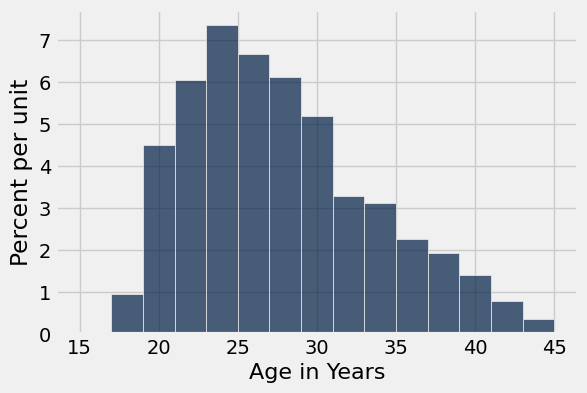

In [17]:
# now, let's visualize the data
# first, age as is
both.hist('Age in Years', bins = np.arange(15, 46, 2))

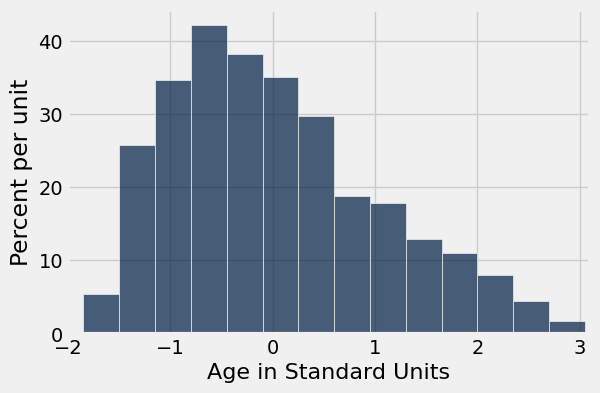

In [18]:
# then, age in standard units
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

## The SD and Bell-Shaped Curves

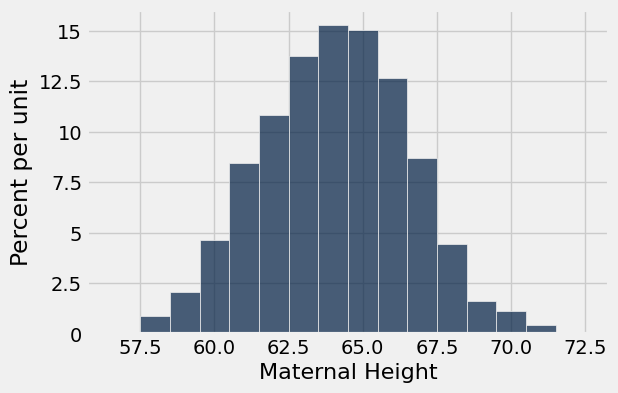

In [19]:
# the mothers's height are distributed in a bell-shaped curve
# let's visualize it
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [20]:
# now, let's compure the mean and SD
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.049403747870528, 2.5250254409674375)

In [21]:
# let's obtain the values within 1 SD of the mean
np.mean(heights) + np.std(heights), np.mean(heights) - np.std(heights)

(66.574429188837968, 61.524378306903088)